In [1]:
import pandas as pd

from cashe import get_cashed_input

In [2]:
df = get_cashed_input()

In [47]:
df.RES_CLAIM_ID.value_counts()

RES_CLAIM_ID
419                                                                           1831
929                                                                           1538
864                                                                           1535
982                                                                           1514
888                                                                           1296
                                                                              ... 
https://bupa.com.sa/ClaimResponse/b3bc12ce-ab8f-44d4-b127-7ef4e49b1615           1
https://bupa.com.sa/ClaimResponse/1256242541                                     1
http://Medgulf.com.sa/ClaimResponse/1752711                                      1
https://tawuniya.com.sa/ClaimResponse/30182a89-403b-4544-93a4-ad2dc381b51d       1
https://tawuniya.com.sa/ClaimResponse/f3e6f7fd-1843-4c12-ae08-4baa8cdfc4ae       1
Name: count, Length: 38972, dtype: int64

In [158]:
def filter_column_by_value_count(df, column_name, threshold):
    value_counts = df[column_name].value_counts()
    to_keep = value_counts[value_counts >= threshold].index
    filtered_df = df[df[column_name].isin(to_keep)]
    return filtered_df

In [118]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np

def plot_value_counts(df, column_name,xlim=999999):

    value_counts = df[column_name].value_counts()
    if xlim<999999:
        print(f'The maximum value of the {column_name} is {value_counts.index[-1]}')
    value_counts = value_counts[value_counts.index<=xlim]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=value_counts.index, y=value_counts.values, legend=False, hue_order=value_counts.index)
    plt.xlabel(column_name)
    plt.ylabel('Counts')
    plt.title(f'Value Counts of {column_name}')
    plt.xticks(rotation=45)
    plt.show()

In [150]:
def log_format(x, pos):
    return f'{int(x)}' if x >= 1 else f'{x:.1f}'

def plot_distribution(df, column_name):
    column_counts = df.groupby(column_name).size()

    plt.figure(figsize=(10, 6))
    sns.histplot(column_counts, bins=range(1, column_counts.max() + 1), kde=False, color='blue')

    plt.xscale('log')
    plt.xlabel(f'Number of Rows per {column_name}')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Rows per {column_name}')

    specific_ticks = [1, 5, 10, 15, 20] + [10**i for i in range(1, int(np.log10(column_counts.max())) + 1)]
    specific_ticks = sorted(set(specific_ticks))
    plt.gca().xaxis.set_major_formatter(FuncFormatter(log_format))

    plt.xticks(specific_ticks)
    plt.show()

In [163]:
def plot_boxplot(df, column_name,threshold):
    plt.figure(figsize=(10, 6))

    df2 = filter_column_by_value_count(df,column_name,threshold=threshold)
    sns.boxplot(data=df2, y=column_name)
    plt.xlabel('Service')
    plt.ylabel('Net Value')
    plt.title(f'Box Plot of Net Value for {column_name.lower()}')
    plt.show()

def plot_histogram(df, column_name,threshold):

    plt.figure(figsize=(10, 6))
    df2 = filter_column_by_value_count(df,column_name,threshold=threshold)

    sns.histplot(data=df2, x=column_name, kde=True)
    plt.xlabel(f'{column_name}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Net Value for {column_name}')
    plt.show()

def plot_violin_distribution(df, column_name,threshold):
    plt.figure(figsize=(14, 7))

    df2 = filter_column_by_value_count(df,column_name,threshold=threshold)

    sns.violinplot(x=df2[column_name], color='y')
    plt.xlabel(f'{column_name}')
    plt.ylabel('Density')
    plt.title(f'Violin Plot of {column_name}')
    plt.tight_layout()
    plt.show()

In [152]:
df

,CREATED_BY_USER,CREATION_DATE,VISIT_ID,NET_WITH_VAT,SERVICE_DESCRIPTION,QTY,LINE_CLAIMED_AMOUNT,LINE_CLAIMED_AMOUNT_SAR,CO_PAY,CO_INSURANCE,...,ELIGIBILITY_API_TRANS_ID,CLAIM_IDENTIFIER,ATTACHED_FILES,ATTACHMENT_TYPE,NEW_BORN,PATIENT_IDENTITY_TYPE,BILLABLE_PERIOD_START,BILLABLE_PERIOD_END,BATCH_PERIOD_START,BATCH_PERIOD_END
0,9521,2024-04-04 22:57:57,230089,56.12,Unlisted Code,1.0,61.00,61.00,0.00,61.00,...,1680350.0,4430078.0,929362-34-4430078_OPDUCAF_2024-04-04_22-57-36_...,FILE,N,H,2024-03-28 00:00:00,2024-04-11 00:00:00,2024-03-01,2024-03-31
1,9521,2024-04-04 23:02:21,230117,202.40,TSH,1.0,220.00,220.00,0.00,220.00,...,1643690.0,4430087.0,1083147-3-4430087_OPDUCAF_2024-04-04_23-01-52_...,FILE,N,H,2024-03-12 00:00:00,2024-03-26 00:00:00,2024-03-01,2024-03-31
2,9521,2024-04-04 23:08:38,230160,408.08,In vivo laboratory,1.0,475.00,475.00,10.75,464.25,...,1616370.0,4430098.0,1339075-6-4430098_OPDUCAF_2024-04-04_23-08-22_...,FILE,N,H,2024-03-04 00:00:00,2024-03-18 00:00:00,2024-03-01,2024-03-31
3,9521,2024-04-04 22:26:08,229872,24.27,ELICA-M CREAM 30 GM,1.0,25.55,25.55,4.85,20.70,...,1638278.0,4430011.0,656928-60-4430011_OPDUCAF_2024-04-04_22-25-48_...,FILE,N,H,2024-03-10 00:00:00,2024-03-24 00:00:00,2024-03-01,2024-03-31
4,9521,2024-04-04 22:34:22,229913,80.64,Peripheral intravenous cannula,1.0,90.00,90.00,14.40,75.60,...,1657180.0,4430028.0,1019628-25-4430028_OPDUCAF_2024-04-04_22-33-56...,FILE,N,H,2024-03-18 00:00:00,2024-04-01 00:00:00,2024-03-01,2024-03-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488828,9593,2024-01-23 17:20:54,204110,242.48,Quantitative Troponin (Protein) Analysis,1.0,324.39,324.39,0.00,324.39,...,NaN,4404986.0,1348956-2-4404986_OPDUCAF_2024-01-23_17-17-31_...,FILE,N,IQ,2023-12-24 10:28:07,2023-12-28 12:07:18,2023-12-01,2023-12-31
488829,10962,2024-01-28 01:01:05,204377,1.06,NEBILET 5MG TABLETS,1.0,1.14,1.14,0.00,1.14,...,NaN,4404989.0,1349595-2-4404989_LABCHRT1_2024-01-28_01-00-04...,FILE,N,IQ,2023-12-27 20:51:37,2023-12-31 17:16:53,2023-12-01,2023-12-31
488830,10962,2024-01-28 01:01:05,204377,1.14,Unlisted Procedure Code,5.0,1.77,1.77,0.00,1.77,...,NaN,4404989.0,1349595-2-4404989_LABCHRT1_2024-01-28_01-00-04...,FILE,N,IQ,2023-12-27 20:51:37,2023-12-31 17:16:53,2023-12-01,2023-12-31
488831,10962,2024-01-28 01:01:05,204377,1.79,SALURIN 20MG-2ML AMPOULES,1.0,1.93,1.93,0.00,1.93,...,NaN,4404989.0,1349595-2-4404989_LABCHRT1_2024-01-28_01-00-04...,FILE,N,IQ,2023-12-27 20:51:37,2023-12-31 17:16:53,2023-12-01,2023-12-31


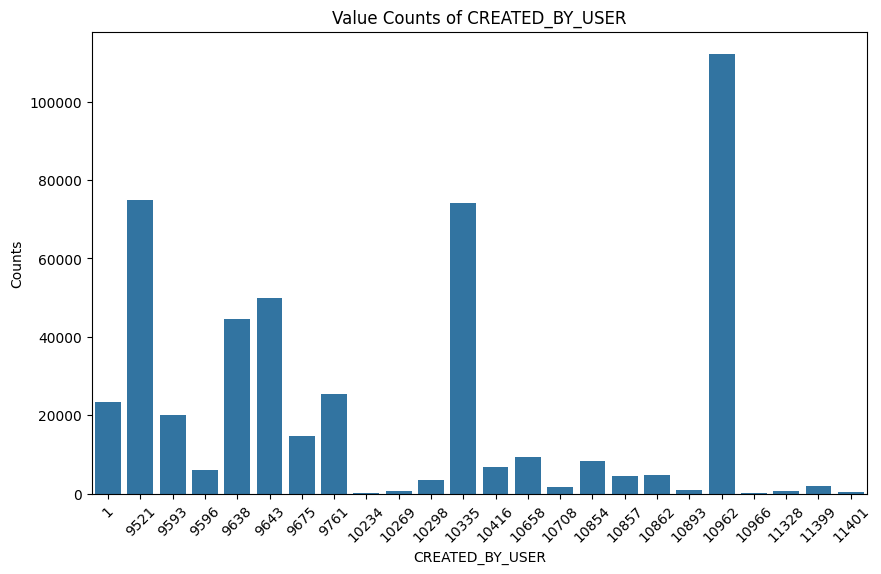

In [153]:
plot_value_counts(df,'CREATED_BY_USER')

The maximum value of the QTY is 2500.0


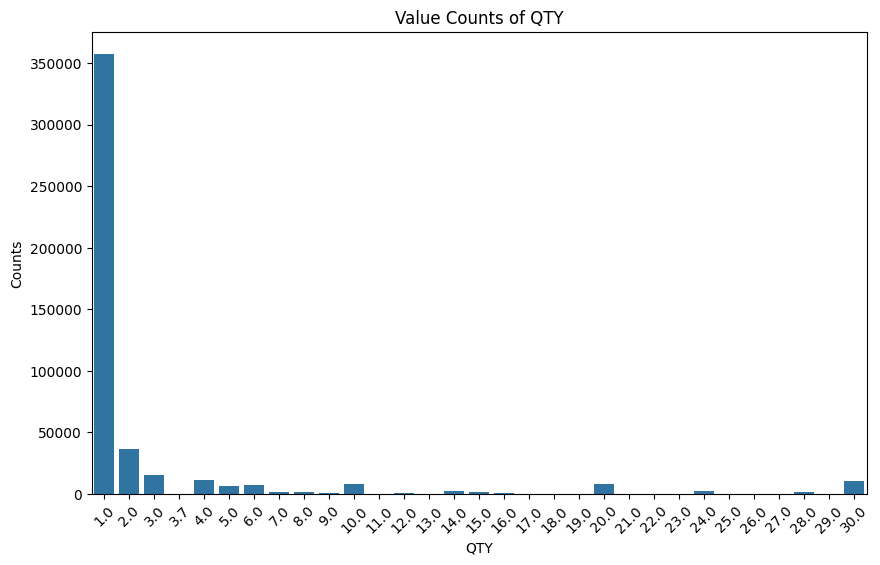

In [156]:
plot_value_counts(df,'QTY',xlim=30)

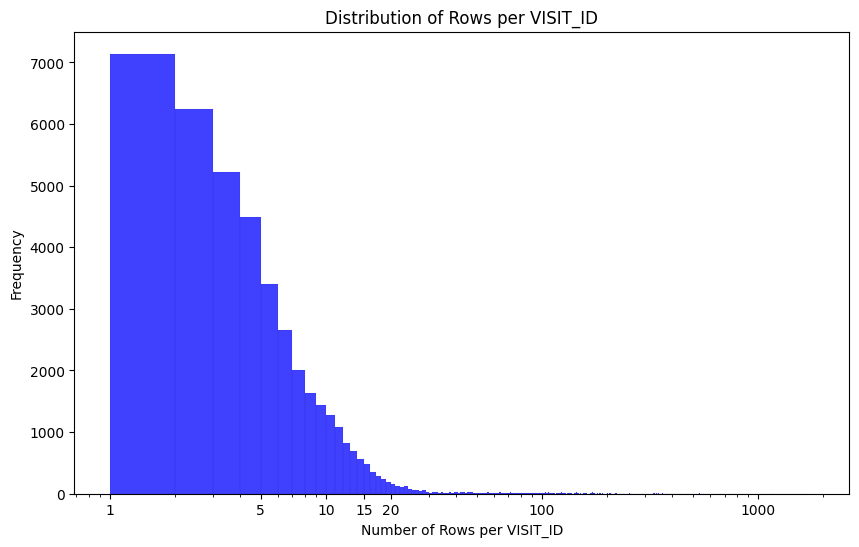

In [155]:
plot_distribution(df,'VISIT_ID')

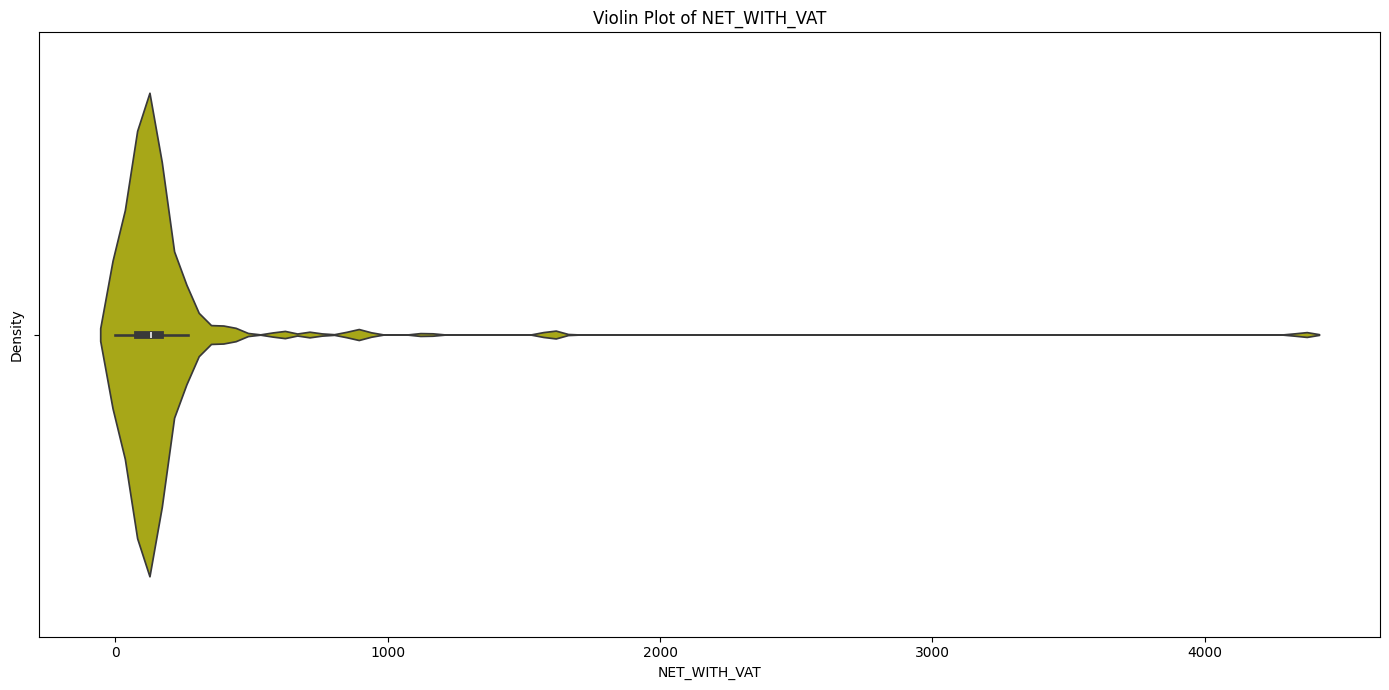

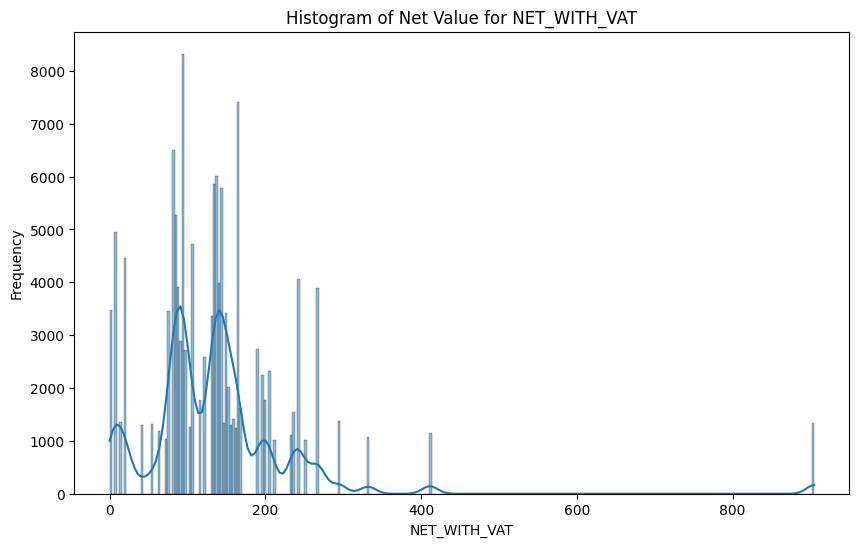

In [172]:
plot_violin_distribution(df,'NET_WITH_VAT',threshold=500)
plot_histogram(df,'NET_WITH_VAT',threshold=1000)

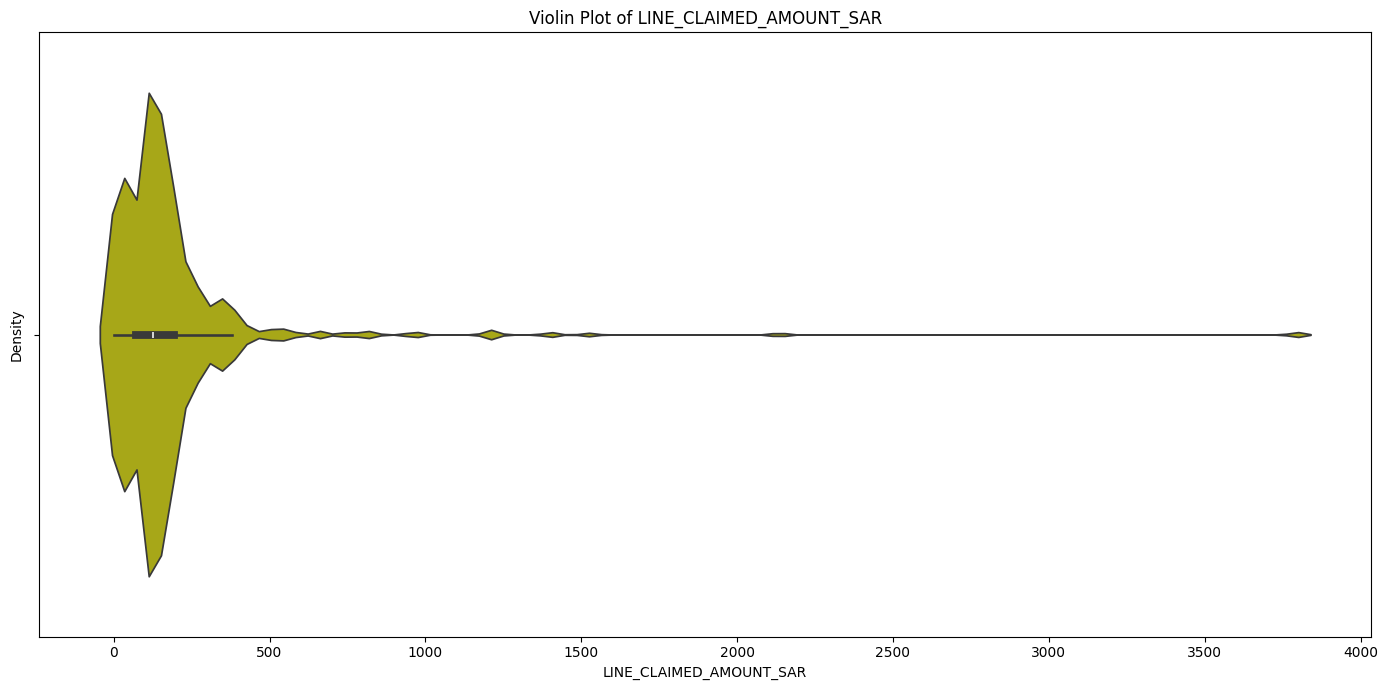

In [177]:
col = 'LINE_CLAIMED_AMOUNT_SAR'
plot_violin_distribution(df,col,threshold=500)

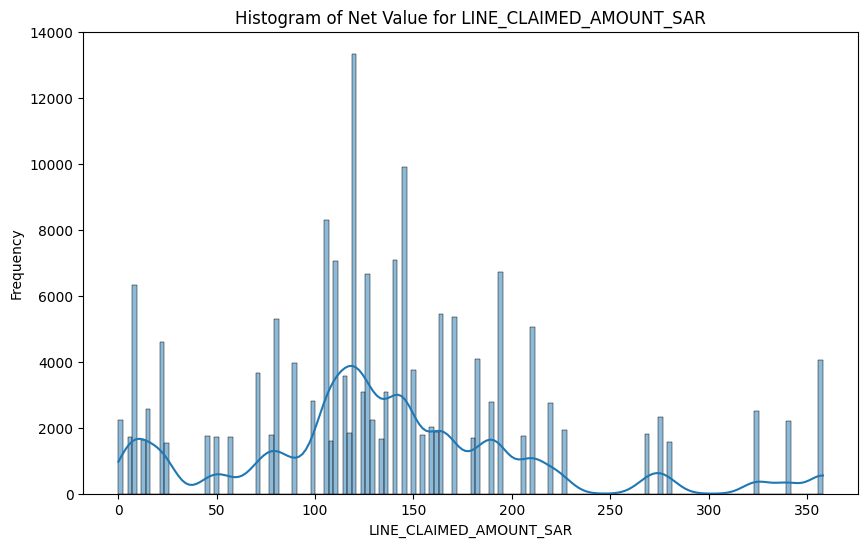

In [179]:
plot_histogram(df,col,threshold=1500)